In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
t_data = pd.read_csv("transcripts_dataset_final.csv.gz")
print(t_data.shape)

(105360, 14)


In [4]:
print(f"avg. confidence: {np.mean(t_data.avg_confidence):.1%}")
print(f"avg. words: {np.mean(t_data.word_count):.2f}")
print(f"Total hours of podcasts: {t_data.duration.sum()/60:.2f}")
print(f"Total number of words: {t_data.word_count.sum()}")

avg. confidence: 83.2%
avg. words: 5727.83
Total hours of podcasts: 59433.08
Total number of words: 603483935


In [5]:
t_data.language.value_counts()

['en']       79452
['en-US']    20264
['en-GB']     2335
['en-AU']     1377
['en-CA']      962
['en-PH']      368
['en-IE']      243
['en-NZ']      141
['en-ZA']       86
['nl-BE']       39
['hi']          32
['id']          28
['ml']          11
['ms']           9
['pt']           5
['en-JM']        2
['en-IN']        2
['ga']           2
['ta']           1
['es']           1
Name: language, dtype: int64

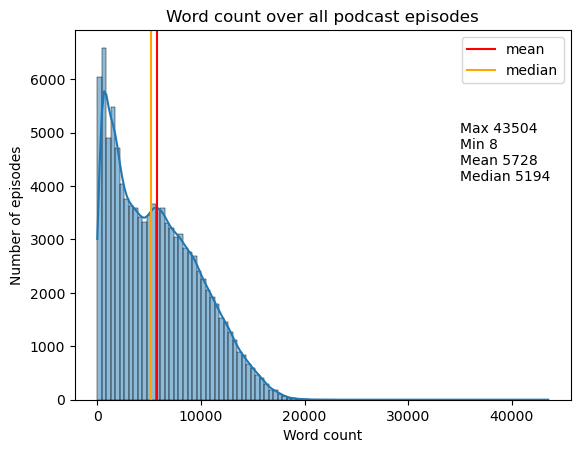

In [9]:
sns.histplot(t_data.word_count, bins = 100, kde = True)
plt.axvline(np.mean(t_data.word_count), color = "r", label = "mean")
plt.axvline(np.median(t_data.word_count), color ="orange", label = "median")
plt.text(35000, 5000, f"Max {max(t_data.word_count)}")
plt.text(35000, 4700, f"Min {min(t_data.word_count)}")
plt.text(35000, 4400, f"Mean {np.mean(t_data.word_count):.0f}")
plt.text(35000, 4100, f"Median {np.median(t_data.word_count):.0f}")
plt.title("Word count over all podcast episodes")
plt.xlabel("Word count")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()

In [29]:
print(f"There are {len(t_data[t_data.word_count < 50])} podcasts with less than 50 words")
print(f"There are {len(t_data[t_data.word_count < 100])} podcasts with less than 100 words")
print(f"There are {len(t_data[t_data.word_count < 250])} podcasts with less than 250 words")
print(f"There are {len(t_data[t_data.word_count < 1000])} podcasts with less than 1000 words")
print(f"There are {len(t_data[t_data.word_count > 20000])} podcasts with more than 20 000 words")

There are 236 podcasts with less than 50 words
There are 610 podcasts with less than 100 words
There are 2465 podcasts with less than 250 words
There are 14136 podcasts with less than 1000 words
There are 33 podcasts with more than 20 000 words


In [18]:
print(f"On average, {sum(t_data.word_count) / sum(t_data.duration):.2f} words are spoken per minute")

On average, 169.23 words are spoken per minute


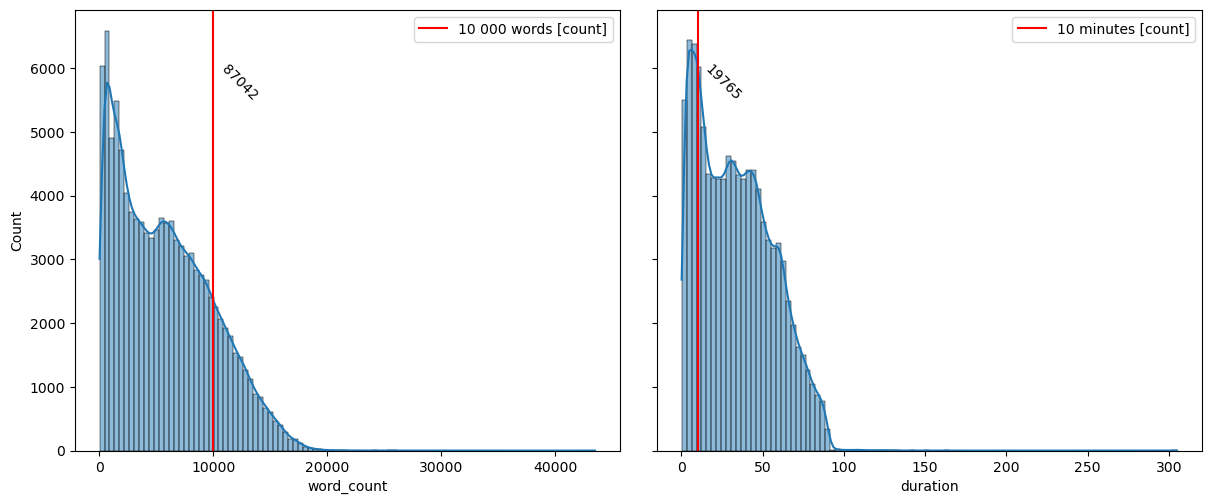

In [30]:
# Calculate label stats for below charts
duration_10 = t_data.groupby(t_data.duration <=10)["duration"].count().values[1]
word_count_10 = t_data.groupby(t_data.word_count <=10000)["word_count"].count().values[1]

# plot
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
fig.tight_layout()

sns.histplot(t_data.word_count, bins = 100, kde = True, ax= axs[0])
sns.histplot(t_data.duration, bins = 100, kde = True, ax= axs[1])
axs[0].axvline(10000, color= "r", label = "10 000 words [count]")
axs[0].text(10500, 5500, word_count_10, rotation=-45)
axs[1].axvline(10, color= "r", label ="10 minutes [count]")
axs[1].text(13, 5500, duration_10, rotation=-45)
axs[0].legend()
axs[1].legend()
plt.show()

In [27]:
# Duration stats
print(f"Max duration {max(t_data.duration):.2f}")
print(f"Min duration {min(t_data.duration):.2f}")
print(f"Mean duration {np.mean(t_data.duration):.2f}")
print(f"Median duration {np.median(t_data.duration):.2f}")
print(f"There are {len(t_data[t_data.duration < 1])} podcasts shorter than 1 min")
print(f"There are {len(t_data[t_data.duration < 5])} podcasts shorter than 5 min")
print(f"There are {len(t_data[t_data.duration > 100])} podcasts longer than 100 min")

Max duration 304.95
Min duration 0.18
Mean duration 33.85
Median duration 31.64
There are 741 podcasts shorter than 1 min
There are 9611 podcasts shorter than 5 min
There are 83 podcasts longer than 100 min


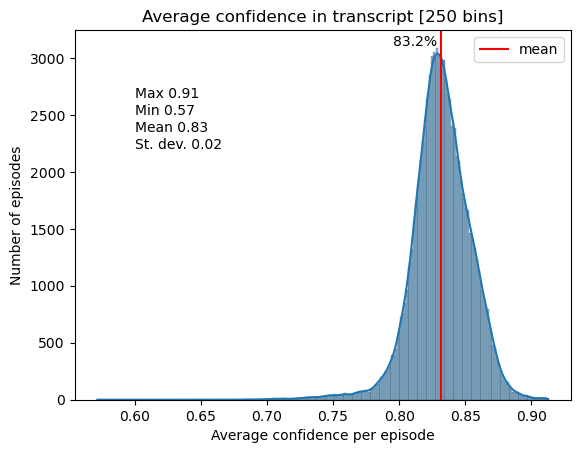

In [86]:
sns.histplot(t_data.avg_confidence, kde=True, bins = 250)
plt.axvline(np.mean(t_data.avg_confidence), color = "r", label = "mean")
plt.text(0.795, 3110, f"{np.mean(t_data.avg_confidence):.1%}")
plt.text(0.6, 2650, f"Max {max(t_data.avg_confidence):.2f}")
plt.text(0.6, 2500, f"Min {min(t_data.avg_confidence):.2f}")
plt.text(0.6, 2350, f"Mean {np.mean(t_data.avg_confidence):.2f}")
plt.text(0.6, 2200, f"St. dev. {np.std(t_data.avg_confidence):.2f}")
plt.title("Average confidence in transcript [250 bins]")
plt.xlabel("Average confidence per episode")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()